# Observations from the results:
1. From the Capomulin Treatment of MouseI509, the tumor volume increased in the first 20 days after treatment, then start to decrease obviously with some small bounce back.
2. The average tumor volume and the weight of the mouse have strong positive correlation. The larger the tumor volume, the larger the mouse weight.
3. The Capomulin is one of the most effective drug as the final tumor volume is the smallest after the treatment.

In [55]:
#import required libraries

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [56]:
# Read the given dataset and generate dataframe
metadata = "./data/mouse_metadata.csv"
study_results = "./data/Study_results.csv"

meta_df = pd.read_csv(metadata,delimiter=",")
results_df = pd.read_csv(study_results,delimiter=",")

In [57]:
# Combine the data into a single dataset
results_df=results_df.merge(meta_df,on="Mouse ID",how="left")
results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group = results_df.groupby("Drug Regimen")
stat_sum = drug_group["Tumor Volume (mm3)"].describe().rename(columns = {"mean": "Mean Tumor Volume","std": "Tumor Volume Std. Dev."})
stat_sum.drop(["count","min","25%","50%","75%","max"],axis =1,inplace = True)
stat_sum["Median Tumor Volume"]=drug_group["Tumor Volume (mm3)"].median()
stat_sum["Tumor Volume Variance"]=drug_group["Tumor Volume (mm3)"].var()
stat_sum["Tumor Volume Std. Err."]=drug_group["Tumor Volume (mm3)"].sem()
stat_sum = stat_sum[["Mean Tumor Volume","Median Tumor Volume","Tumor Volume Variance","Tumor Volume Std. Err."]]
stat_sum

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Err.
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331
Propriva,52.322552,50.854632,42.351070,0.512884
Ramicane,40.216745,40.673236,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111


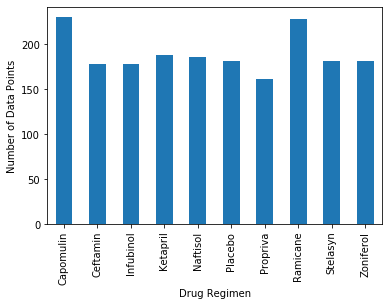

In [59]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
vol_count = drug_group["Mouse ID"].count()
bar_plot1 = vol_count.plot.bar()
bar_plot1 = bar_plot1.set_ylabel("Number of Data Points")

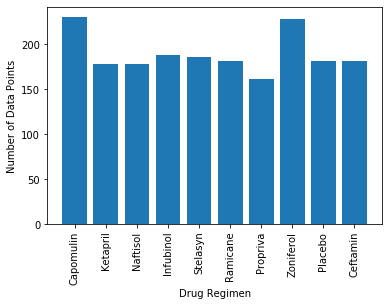

In [60]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
y_axis = vol_count.tolist()
x_axis = results_df["Drug Regimen"].unique()
plt.xticks(rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
bar_plot2=plt.bar(x_axis,y_axis,align="center")

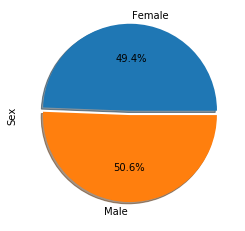

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_group = results_df.groupby("Sex")
sex_count = sex_group["Mouse ID"].count()
pie_plot1 = sex_count.plot.pie(autopct="%1.1f%%",shadow = True,explode = [0.05,0])
ylabel=plt.ylabel("Sex")

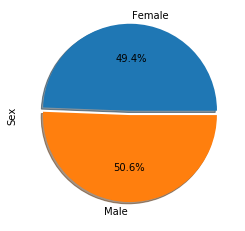

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_size = sex_count.tolist()
labels = results_df["Sex"].unique()
explode = [0.05,0]
pie_plot2 = plt.pie(sex_size,labels = labels,explode = explode,shadow = True,autopct="%1.1f%%")
ylabel=plt.ylabel("Sex")

Results for Capomulin
The lower quartile of final tumor volume for Capomulin is 32.38:
The upper quartile of final tumor volume for Capomulin is 40.16:
The interquartile range of final tumor volume Capomulin Capomulin is: 7.78

Results for Ramicane
The lower quartile of final tumor volume for Ramicane is 31.56:
The upper quartile of final tumor volume for Ramicane is 40.66:
The interquartile range of final tumor volume Ramicane Capomulin is: 9.10

Results for Infubinol
The lower quartile of final tumor volume for Infubinol is 54.05:
The upper quartile of final tumor volume for Infubinol is 65.53:
The interquartile range of final tumor volume Infubinol Capomulin is: 11.48

Results for Ceftamin
The lower quartile of final tumor volume for Ceftamin is 48.72:
The upper quartile of final tumor volume for Ceftamin is 64.30:
The interquartile range of final tumor volume Ceftamin Capomulin is: 15.58

Box plot below shows that, there is an outlier in final tumor volume for Infubinol!


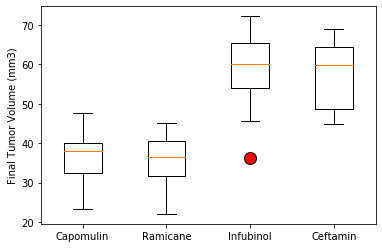

In [63]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
a = results_df.loc[results_df["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"]),["Drug Regimen","Mouse ID","Timepoint","Tumor Volume (mm3)"]]
b = a.groupby(["Drug Regimen","Mouse ID"])
c = b.apply(lambda g: g[g['Timepoint'] == g['Timepoint'].max()])
cap = c.loc[c["Drug Regimen"]=="Capomulin","Tumor Volume (mm3)"]
ram = c.loc[c["Drug Regimen"]=="Ramicane","Tumor Volume (mm3)"]
inf = c.loc[c["Drug Regimen"]=="Infubinol","Tumor Volume (mm3)"]
cef = c.loc[c["Drug Regimen"]=="Ceftamin","Tumor Volume (mm3)"]

#define list for the quartiles
lowerq=[]
upperq=[]
iqr = []
#calculate the lower qurtiles
lowerq.append(quart_cap[0.25])
lowerq.append(quart_ram[0.25])
lowerq.append(quart_inf[0.25])
lowerq.append(quart_cef[0.25])
#calculate the upper qurtiles
upperq.append(quart_cap[0.75])
upperq.append(quart_ram[0.75])
upperq.append(quart_inf[0.75])
upperq.append(quart_cef[0.75])
#calculate the IQR
iqr=np.subtract(upperq,lowerq)
#plot the box plot
fig1, ax1 = plt.subplots()
ticks=["Capomulin","Ramicane","Infubinol","Ceftamin"]
ax1.boxplot([cap,ram,inf,cef],flierprops=dict(markerfacecolor='r',markersize=12))
plt.xticks([1,2,3,4],ticks)
plt.ylabel("Final Tumor Volume (mm3)")

#Print the results out
i=0
for drugs in ticks:
    print("Results for {}".format(drugs))
    print("=====================")
    print("The lower quartile of final tumor volume for {} is {:.2f}:".format(drugs,lowerq[i]))
    print("The upper quartile of final tumor volume for {} is {:.2f}:".format(drugs,upperq[i]))
    print("The interquartile range of final tumor volume {} Capomulin is: {:.2f}\n".format(drugs,iqr[i]))
    i+=1
print("Box plot below shows that, there is an outlier in final tumor volume for Infubinol!")
plt.show()



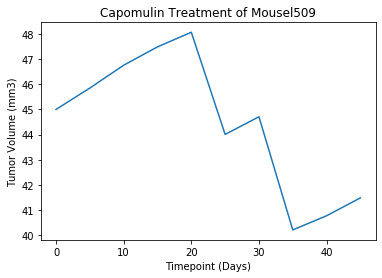

In [64]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_capo = results_df.loc[results_df["Drug Regimen"]=="Capomulin",["Mouse ID","Timepoint","Tumor Volume (mm3)","Weight (g)"]]
mouse_capo1=pd.DataFrame(mouse_capo.groupby("Mouse ID")).iloc[9,1]
title = "Capomulin Treatment of Mouse"+mouse_capo1.iloc[0,0]
line_plot1=mouse_capo1.plot(kind = "line",x = "Timepoint",y="Tumor Volume (mm3)",title=title,legend=False)
line_plot1.set_xlabel("Timepoint (Days)")
line_plot1.set_ylabel("Tumor Volume (mm3)")
plt.show()

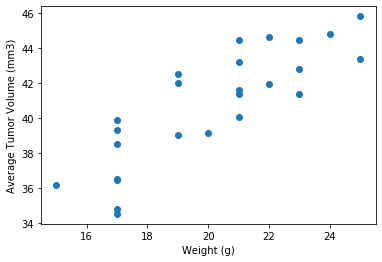

In [65]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight_df = pd.DataFrame(mouse_capo.groupby(["Mouse ID","Weight (g)"])["Tumor Volume (mm3)"].mean())
x_axis = mouse_weight_df.index.get_level_values(1)
y_axis = mouse_weight_df["Tumor Volume (mm3)"]
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
scatter_plot=plt.scatter(x_axis,y_axis)


The correlation between mouse weight and the average tumor volume is 0.84


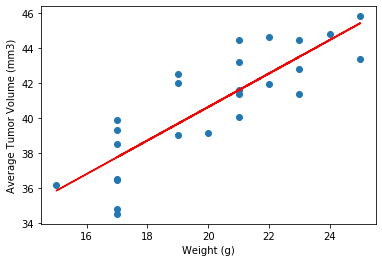

In [66]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
scatter_plot=plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
print("The correlation between mouse weight and the average tumor volume is {:.2f}".format(rvalue))
plt.show()